In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io, color, morphology, filters, data, exposure, segmentation, measure
from matplotlib import pyplot as plt
import plotly
import matplotlib.patches as mpatches


In [ ]:
def plot(img, is_color=False):
    plt.figure(figsize=(8,8))
    if is_color:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap = plt.cm.gray)
        
def plot_subplots(img1, img2):
    plt.figure(figsize=(12,12))
    plt.subplot(1,2,1)
    plt.imshow(img1, cmap = plt.cm.gray)
    plt.subplot(1,2,2)
    plt.imshow(img2, cmap = plt.cm.gray)
    plt.show()

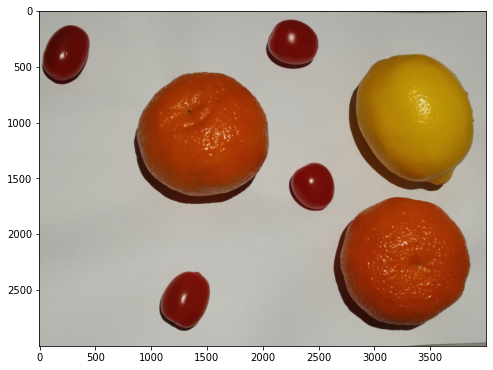

In [ ]:
img = io.imread('/content/IMG_20211227_142856.jpg')
plot(img, True)

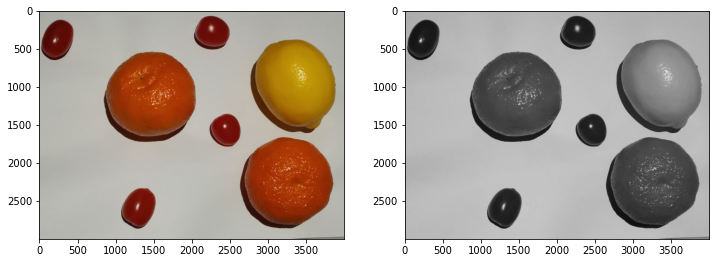

In [ ]:
img_gray = color.rgb2gray(img)
plot_subplots(img, img_gray)

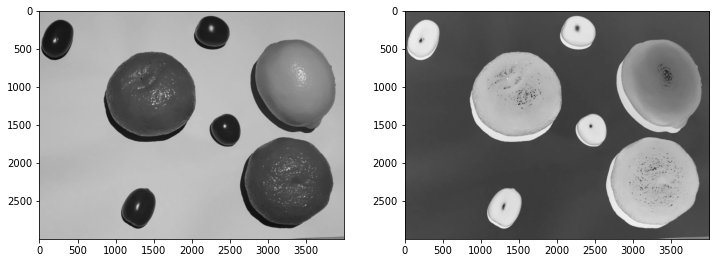

In [ ]:
img_negative = 1-img_gray
plot_subplots(img_gray, img_negative)

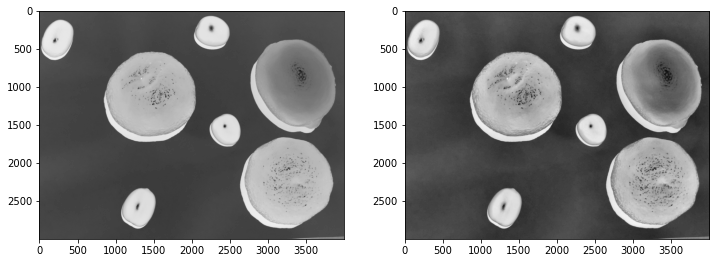

In [ ]:
img_equalized = exposure.equalize_adapthist(img_negative)
img_equalized = (img_equalized*255).astype('uint8')
plot_subplots(img_negative, img_equalized)

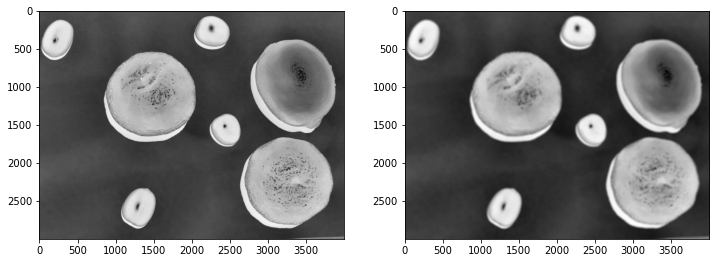

In [ ]:
img_filtered = filters.rank.mean(img_equalized, np.ones([31,31]))
plot_subplots(img_equalized, img_filtered)

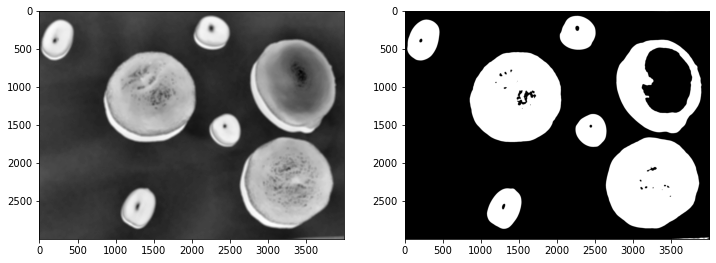

In [ ]:
threshold = filters.threshold_otsu(img_filtered)
img_bin = img_filtered > threshold
plot_subplots(img_filtered, img_bin)

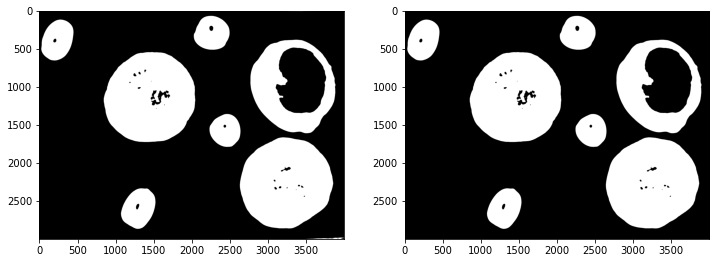

In [ ]:
img_cleared_borders = segmentation.clear_border(img_bin)
plot_subplots(img_bin, img_cleared_borders)

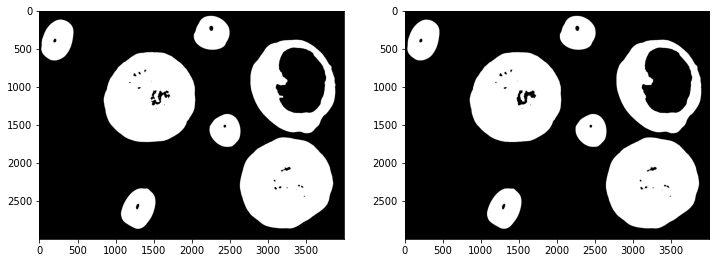

In [ ]:
img_opened = morphology.binary_opening(img_cleared_borders, np.ones([31,31]))
plot_subplots(img_cleared_borders, img_opened)

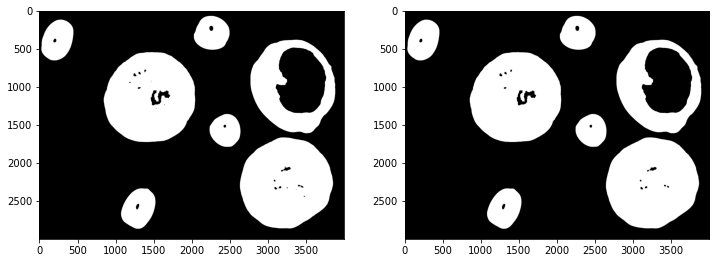

In [ ]:
img_preprocessed = morphology.binary_closing(img_opened, np.ones([11,11]))
plot_subplots(img_opened, img_preprocessed)

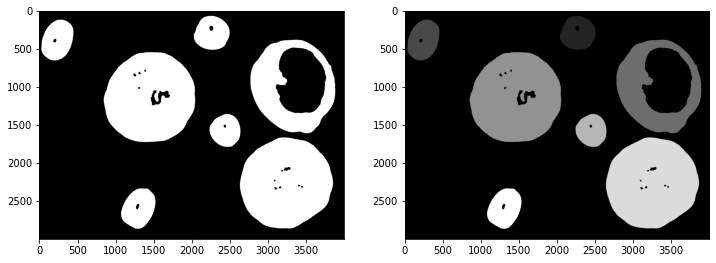

In [ ]:
img_labeled = measure.label(img_preprocessed, connectivity=2)
plot_subplots(img_preprocessed, img_labeled)

In [ ]:
def calc_rectangularity(area, bbox_area):
    return area/bbox_area


def calc_roundness(area, perimeter):
    return (4*np.pi*area)/perimeter**2


def calc_elongation(bbox_width, bbox_length):
    return 1 - bbox_width/bbox_length

In [ ]:
labels = measure.label(img_labeled)
regionprops = measure.regionprops(labels,img_labeled)
properties = [ 'eccentricity', 'area']
len(regionprops)

7

In [ ]:
a = np.zeros(shape=(len(regionprops),3))
for i in range (len(regionprops)):
    a[i]=[calc_rectangularity(regionprops[i].area,regionprops[i].bbox_area),regionprops[i].eccentricity,regionprops[i].bbox_area]
a

array([[7.67658351e-01, 2.90459388e-01, 2.07324000e+05],
       [7.60727662e-01, 7.12589994e-01, 2.24280000e+05],
       [4.52685362e-01, 5.48869775e-01, 1.36220000e+06],
       [7.73198141e-01, 3.06063456e-01, 1.41122300e+06],
       [7.67062877e-01, 3.25034639e-01, 1.74150000e+05],
       [7.66180076e-01, 3.29293316e-01, 1.45543200e+06],
       [7.31656924e-01, 6.67036721e-01, 2.38128000e+05]])

In [ ]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted = km.fit_predict(a)
y_predicted

array([0, 0, 2, 1, 0, 1, 0], dtype=int32)

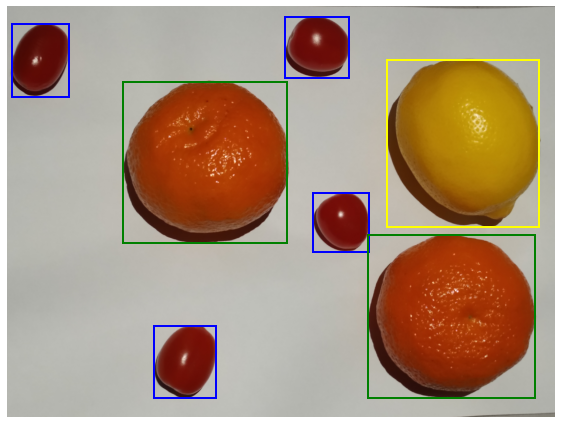

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img)

for i in range(len(regionprops)):
  minr, minc, maxr, maxc = regionprops[i].bbox
  if y_predicted[i] == 0:
      rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                               fill=False, edgecolor='blue', linewidth=2)
      ax.add_patch(rect)
  if y_predicted[i] == 1:
      rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                               fill=False, edgecolor='green', linewidth=2)
      ax.add_patch(rect)
  if y_predicted[i] == 2:
      rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                               fill=False, edgecolor='yellow', linewidth=2)
      ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()